In [3]:
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
import cv2
import keras


In [35]:
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.fashion_mnist.load_data()


In [36]:
xtrain.shape
xtest.shape
X = np.concatenate((xtrain, xtest), axis=0)
y = np.concatenate((ytrain, ytest), axis=0)

In [51]:
#random_state = 42 is a good value to shuffle (given in the official docs)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.15, random_state=42)

In [38]:
print(xtrain.shape, xtest.shape)

(59500, 28, 28) (10500, 28, 28)


In [40]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]


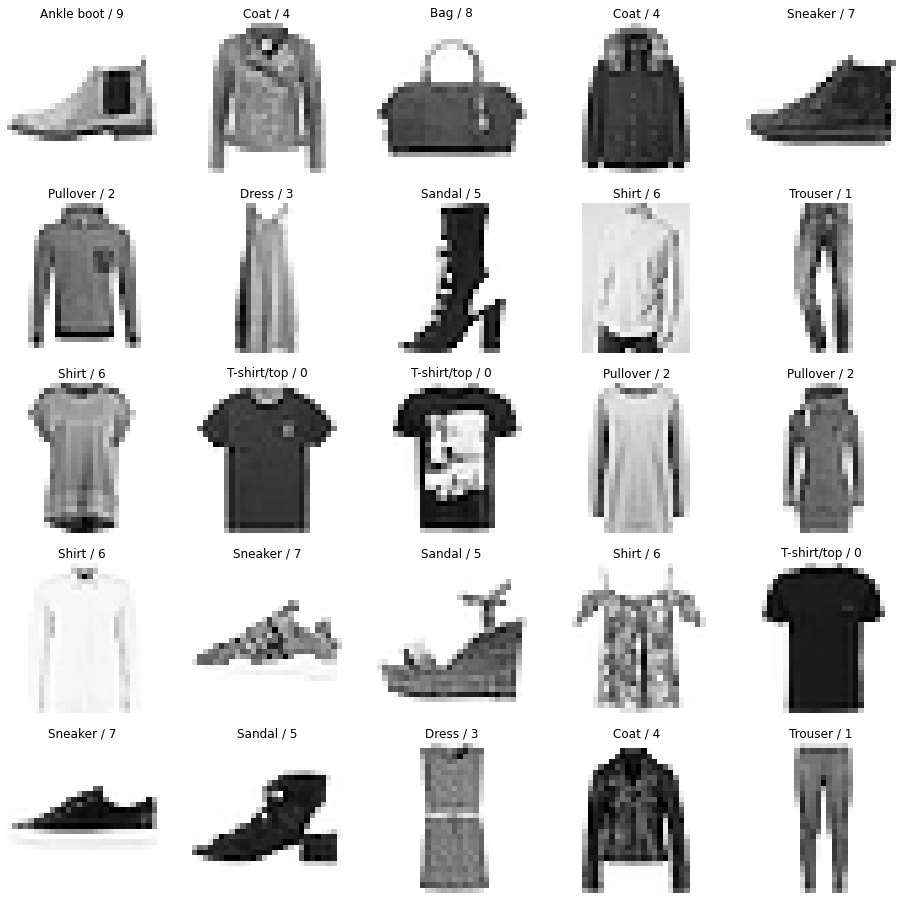

In [43]:
#checking the split data
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(xtrain[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[ytrain[i]],ytrain[i]))

In [52]:

xtrain = xtrain/255
xtest = xtest/255


In [54]:
import keras
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=256,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [55]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [59]:
xtrain, xvalidate, ytrain, yvalidate = train_test_split(xtrain, ytrain, train_size=0.8, random_state=42)

In [61]:
model.fit(xtrain,ytrain,epochs=10,batch_size=512,verbose=1,validation_data=(xvalidate,yvalidate))


Epoch 1/10
93/93 [==============================] - 12s 130ms/step - loss: 0.1591 - accuracy: 0.9438 - val_loss: 0.1722 - val_accuracy: 0.9385
Epoch 2/10
93/93 [==============================] - 13s 142ms/step - loss: 0.1517 - accuracy: 0.9463 - val_loss: 0.1694 - val_accuracy: 0.9392
Epoch 3/10
93/93 [==============================] - 13s 143ms/step - loss: 0.1389 - accuracy: 0.9508 - val_loss: 0.1756 - val_accuracy: 0.9383
Epoch 4/10
93/93 [==============================] - 13s 143ms/step - loss: 0.1304 - accuracy: 0.9545 - val_loss: 0.1707 - val_accuracy: 0.9398
Epoch 5/10
93/93 [==============================] - 13s 145ms/step - loss: 0.1246 - accuracy: 0.9559 - val_loss: 0.1800 - val_accuracy: 0.9347
Epoch 6/10
93/93 [==============================] - 14s 147ms/step - loss: 0.1169 - accuracy: 0.9593 - val_loss: 0.1715 - val_accuracy: 0.9361
Epoch 7/10
93/93 [==============================] - 14s 147ms/step - loss: 0.1073 - accuracy: 0.9637 - val_loss: 0.1684 - val_accuracy: 0.9362

In [64]:
y_pred = model.predict(xtest)
y_pred.round(2)

array([[0.  , 0.  , 0.14, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.95, 0.  , 0.01, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.04, 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [65]:
model.evaluate(xtest, ytest)

329/329 [==============================] - 1s 4ms/step - loss: 0.2642 - accuracy: 0.9180


[0.26424577832221985, 0.9179999828338623]

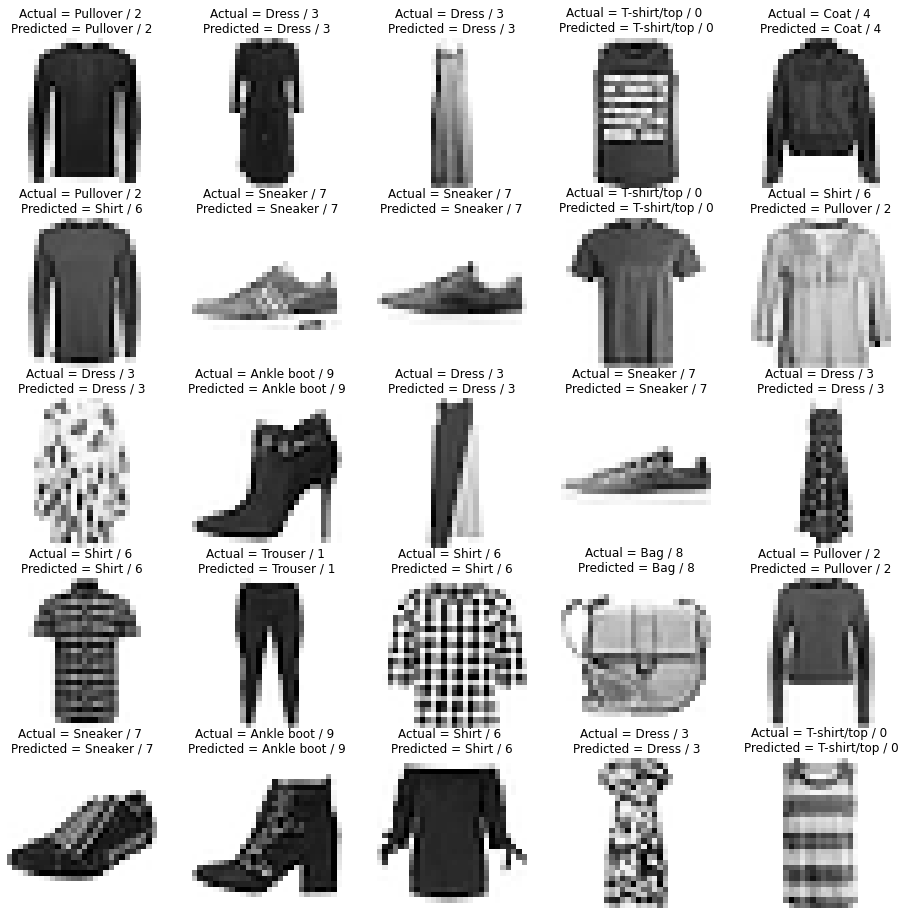

In [66]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(xtest[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[ytest[i]], ytest[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [67]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(ytest, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

In [68]:
model.save('fashion_mnist_cnn_model.h5')